In [2]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI
from Minimax_agent import Minimax_agent
from Expectimax_agent import ExpectimaxAgent

In [3]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()

Input Agents

In [ ]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [4]:

agent1 = Minimax_agent(1)
agent12=ExpectimaxAgent(1)
play_vs_other_agent(env, agent12, agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   |     | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

2

Minimax Random Agent vs UONI (Universal Optimization Neural Interface)

In [5]:
import matplotlib.pyplot as plt
import wandb
# Assuming ws is a list of winners
def print_graph(ws, level):
    wandb.init(project="coin_game")
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    fig, ax = plt.subplots()
    plt.bar(winners, win_counts)
    
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()
    return fig

100%|██████████| 5/5 [00:14<00:00,  2.84s/it]


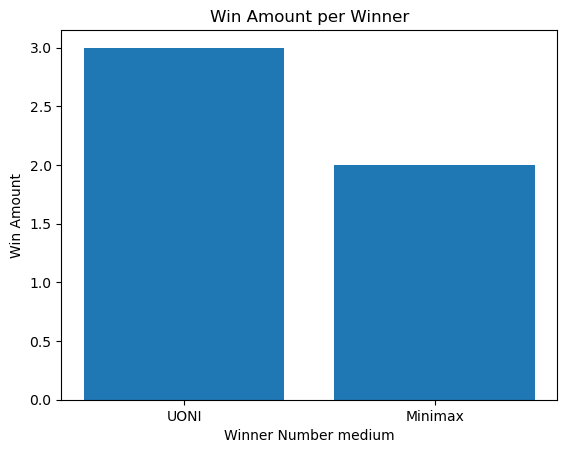

100%|██████████| 5/5 [00:14<00:00,  3.00s/it]


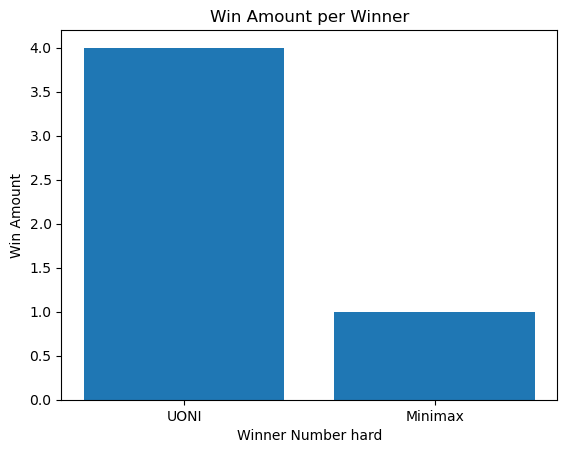

In [7]:
from tqdm import tqdm
import wandb

wandb.init(project="coin_game")

ws = {'medium':[], 'hard':[]}
for level in ['medium', 'hard']:
    for i in tqdm(range(30)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=Minimax_agent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=Minimax_agent(1), agent2=UONI(2, level), render=False))
        
    fig = print_graph(ws[level], level)
    wandb.log({"Winners": wandb.Image(fig)})

wandb.finish()
        

UONI vs Expectimax

In [23]:
import matplotlib.pyplot as plt
import wandb

def print_graph(ws, level):
    #wandb.init(project="coin_game")
    
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1, 2]]

    fig, ax = plt.subplots()
    
    ax.bar(winners, win_counts)

    ax.set_xlabel('Winner Number ' + level)
    ax.set_ylabel('Win Amount')
    ax.set_title('Win Amount per Winner')

    #wandb.log({"Winners": wandb.Image(fig)})

    plt.show()
    
    plt.close(fig)

In [25]:
from tqdm import tqdm
import wandb
wandb.init(project="coin_game")
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(30)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=UONI(2, level), render=False))
    fig = print_graph(ws[level], level)
    wandb.log({"Winners": wandb.Image(fig)})

wandb: ERROR Control-C detected -- Run data was not synced


Testing entre agentes propios

In [5]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["Expectimax", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 30/30 [01:41<00:00,  3.38s/it]


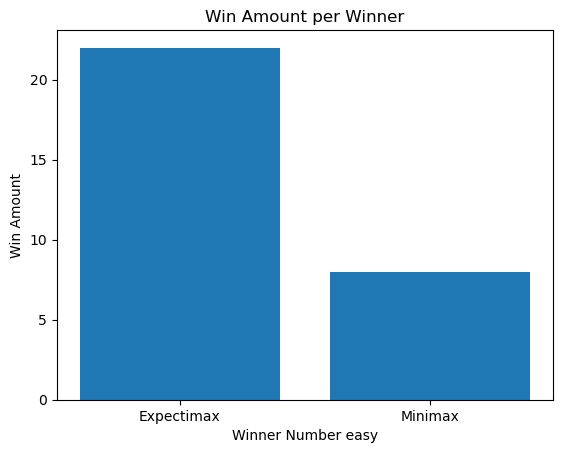

100%|██████████| 30/30 [01:51<00:00,  3.70s/it]


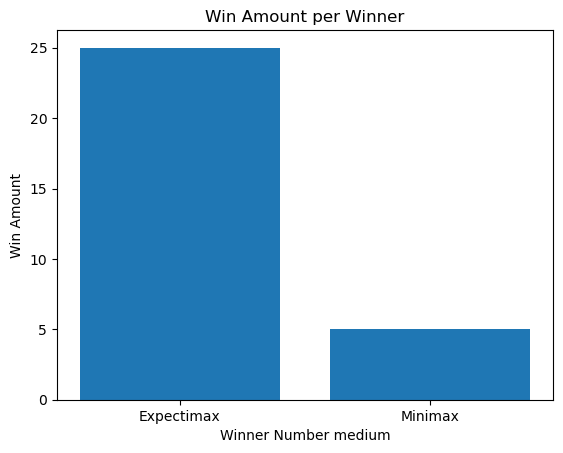

100%|██████████| 30/30 [02:00<00:00,  4.02s/it]


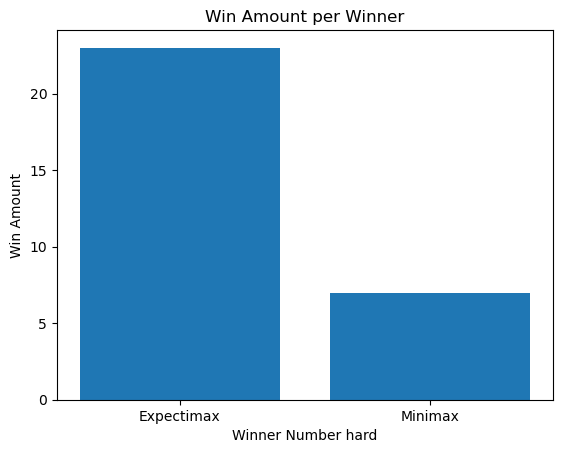

In [6]:
from tqdm import tqdm

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(30)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=Minimax_agent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=Minimax_agent(1), agent2=ExpectimaxAgent(1), render=False))
    print_graph(ws[level], level)